# Data Mining Week 8
-------------------------------------------
Briaan Putrantio
0706022010021

Import library yang dibutuhkan

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from statistics import mode

Load dataset

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/Bepe09/DM-Week8/main/Property%20Dataset%20-%20Clustering%20-%20Data%20Rumah%20(baru).csv")
data.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Below Standard,Setro Baru Utara,30.0,60.0,2.0,1.0,2.0,287799000,Belum,NaN,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


cek missing value

In [3]:
data.isnull().sum()

Area Category                      1
Nama Daerah                        1
Luas Tanah (m2)                    1
Luas Bangunan (m2)                 1
Jumlah Kamar                       1
Jumlah Kamar Mandi                 2
Tingkat/Lantai                     2
Harga Penawaran (dari Owner)       1
Terjual/Belum                      1
Arah Hadap Rumah                  83
Posisi Rumah                     116
Lebar Jalan Depan Rumah (ROW)     42
dtype: int64

mengisi missing value

In [4]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
data.iloc[:,:] = imputer.fit_transform(data)
data.head(5)

data.isnull().sum()

Area Category                    0
Nama Daerah                      0
Luas Tanah (m2)                  0
Luas Bangunan (m2)               0
Jumlah Kamar                     0
Jumlah Kamar Mandi               0
Tingkat/Lantai                   0
Harga Penawaran (dari Owner)     0
Terjual/Belum                    0
Arah Hadap Rumah                 0
Posisi Rumah                     0
Lebar Jalan Depan Rumah (ROW)    0
dtype: int64

In [5]:
data.isnull().any()

Area Category                    False
Nama Daerah                      False
Luas Tanah (m2)                  False
Luas Bangunan (m2)               False
Jumlah Kamar                     False
Jumlah Kamar Mandi               False
Tingkat/Lantai                   False
Harga Penawaran (dari Owner)     False
Terjual/Belum                    False
Arah Hadap Rumah                 False
Posisi Rumah                     False
Lebar Jalan Depan Rumah (ROW)    False
dtype: bool

In [6]:
data.dtypes

Area Category                     object
Nama Daerah                       object
Luas Tanah (m2)                  float64
Luas Bangunan (m2)               float64
Jumlah Kamar                     float64
Jumlah Kamar Mandi               float64
Tingkat/Lantai                   float64
Harga Penawaran (dari Owner)      object
Terjual/Belum                     object
Arah Hadap Rumah                  object
Posisi Rumah                      object
Lebar Jalan Depan Rumah (ROW)     object
dtype: object

label encoder

In [7]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

data["Area Category"] = lb.fit_transform(data["Area Category"])
data["Nama Daerah"] = lb.fit_transform(data["Nama Daerah"])
data["Harga Penawaran (dari Owner)"] = lb.fit_transform(data["Harga Penawaran (dari Owner)"])
data["Terjual/Belum"] = lb.fit_transform(data["Terjual/Belum"])
data["Arah Hadap Rumah"] = lb.fit_transform(data["Arah Hadap Rumah"])
data["Posisi Rumah"] = lb.fit_transform(data["Posisi Rumah"])
data["Lebar Jalan Depan Rumah (ROW)"] = lb.fit_transform(data["Lebar Jalan Depan Rumah (ROW)"])

data.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,3,11,240.0,300.0,4.0,3.0,2.0,94,0,3,2,0
1,0,100,30.0,60.0,2.0,1.0,2.0,79,0,3,2,1
2,3,48,170.0,170.0,5.0,4.0,2.0,74,0,1,0,0
3,2,48,187.0,250.0,5.0,5.0,2.0,84,0,3,2,0
4,1,48,350.0,600.0,5.0,5.0,2.0,124,0,0,2,0


scaling

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(data)

## K-Means Clustering

In [9]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# set the parameter for evaluating K
ssd = []
# check the inertia for each K
for k in range(1, 11):
    kmeansmodel = KMeans(n_clusters=k)
    kmeansmodel.fit(scaled)
    ssd.append(kmeansmodel.inertia_)

D:\Aplikasi\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Training model K-Means pada dataset

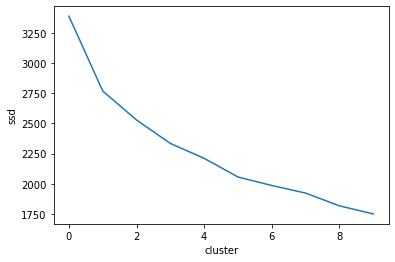

In [10]:
plt.xlabel("cluster")
plt.ylabel("ssd")
plt.plot(ssd)

In [11]:
from kneed import KneeLocator

Knee = KneeLocator(range(1,11), ssd, curve = "convex", direction = "decreasing")
print("the best k for your model is", Knee.elbow)

the best k for your model is 4


In [12]:
kmeans = KMeans(init="random", n_clusters=4, n_init=300, random_state=42).fit(scaled)
label = kmeans.fit_predict(scaled)
label

array([3, 1, 3, 0, 0, 2, 1, 1, 1, 3, 3, 1, 1, 3, 3, 3, 3, 3, 0, 1, 3, 1,
       3, 0, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 2, 3, 1, 1,
       1, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1, 3, 0, 3, 0, 3, 0, 0, 3, 3, 3, 1,
       3, 3, 0, 1, 3, 3, 0, 0, 0, 2, 2, 2, 0, 3, 0, 0, 3, 1, 1, 3, 0, 1,
       1, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 1, 3, 1, 3, 3, 3, 1, 1, 3, 1, 0,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 1, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 3,
       0, 0, 1, 2, 1, 0, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 1, 3, 0, 1, 3, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 2, 1, 1, 3, 2, 1, 3, 1, 0, 2, 3, 0,
       0, 3, 1, 3, 3, 3, 0, 3, 3, 0, 0, 3, 3, 0, 3, 3, 3, 3, 2, 2, 3, 2,
       3, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 3, 3, 3, 1, 0, 1, 0, 2, 3, 2, 0,
       2, 1, 1, 2, 0, 1, 2, 2, 1, 1, 0, 3, 3, 0, 1, 0, 0, 2, 3, 0, 1, 3,
       1, 1, 1, 0, 0, 0, 2, 0, 3, 2, 1, 3, 3, 0, 0, 3, 1, 0, 0, 0, 0, 0,
       0, 3, 2, 1, 0, 2, 3, 0, 3, 3, 0, 2, 3, 2, 1,

In [13]:
data["Cluster"] = label
data.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),Cluster
0,3,11,240.0,300.0,4.0,3.0,2.0,94,0,3,2,0,3
1,0,100,30.0,60.0,2.0,1.0,2.0,79,0,3,2,1,1
2,3,48,170.0,170.0,5.0,4.0,2.0,74,0,1,0,0,3
3,2,48,187.0,250.0,5.0,5.0,2.0,84,0,3,2,0,0
4,1,48,350.0,600.0,5.0,5.0,2.0,124,0,0,2,0,0


Kesimpulan dari cluster:

In [14]:
data["K-Means"] = label

data.groupby("K-Means").agg(Area_Category = ('Area Category',pd.Series.mode),
                                 Nama_Daerah = ('Nama Daerah',pd.Series.mode),
                                 Luas_Tanah = ('Luas Tanah (m2)', 'mean'),
                                 Luas_Bangunan = ('Luas Bangunan (m2)','mean'),
                                 Jumlah_Kamar = ('Jumlah Kamar','mean'), Jumlah_Kamar_mandi = ('Jumlah Kamar Mandi','mean'),
                                 Tingkat_Lantai = ('Tingkat/Lantai ','mean'),
                                 Harga_Penawaran = ('Harga Penawaran (dari Owner)', 'mean'),
                                 Terjual_Belum = ('Terjual/Belum',pd.Series.mode),
                                 Arah_Hadap_Rumah = ('Arah Hadap Rumah',pd.Series.mode),
                                 Posisi_Rumah = ('Posisi Rumah', pd.Series.mode),
                                 Lebar_Jalan_Depan_Rumah = ('Lebar Jalan Depan Rumah (ROW)', pd.Series.mode),
                                 Count = ("Cluster",'count'))

,Area_Category,Nama_Daerah,Luas_Tanah,Luas_Bangunan,Jumlah_Kamar,Jumlah_Kamar_mandi,Tingkat_Lantai,Harga_Penawaran,Terjual_Belum,Arah_Hadap_Rumah,Posisi_Rumah,Lebar_Jalan_Depan_Rumah,Count
K-Means,,,,,,,,,,,,,
0,1,11,226.760000,302.950000,5.040000,4.200000,2.120000,101.470000,0,1,2,0,100
1,0,"[11, 30, 114]",120.568966,129.137931,2.965517,1.982759,1.629310,62.120690,0,3,2,0,58
2,2,"[11, 28]",617.904762,668.785714,6.357143,5.285714,1.916667,74.690476,0,3,2,2,42
3,3,30,132.222222,150.611111,3.462963,2.509259,1.712963,76.453704,0,3,2,0,108


## Hierarchical Clustering

Plot Dendrogram untuk membantu menentukan jumlah cluster

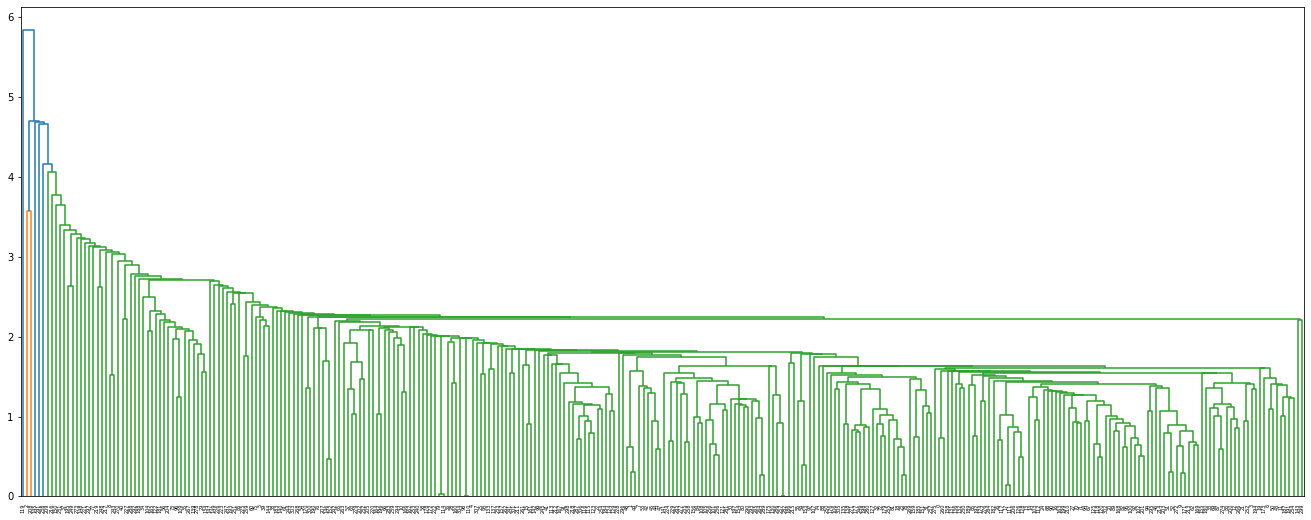

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize = (23, 9))
linkage_data = linkage(scaled, method='single')
dendrogram(linkage_data)

plt.show()

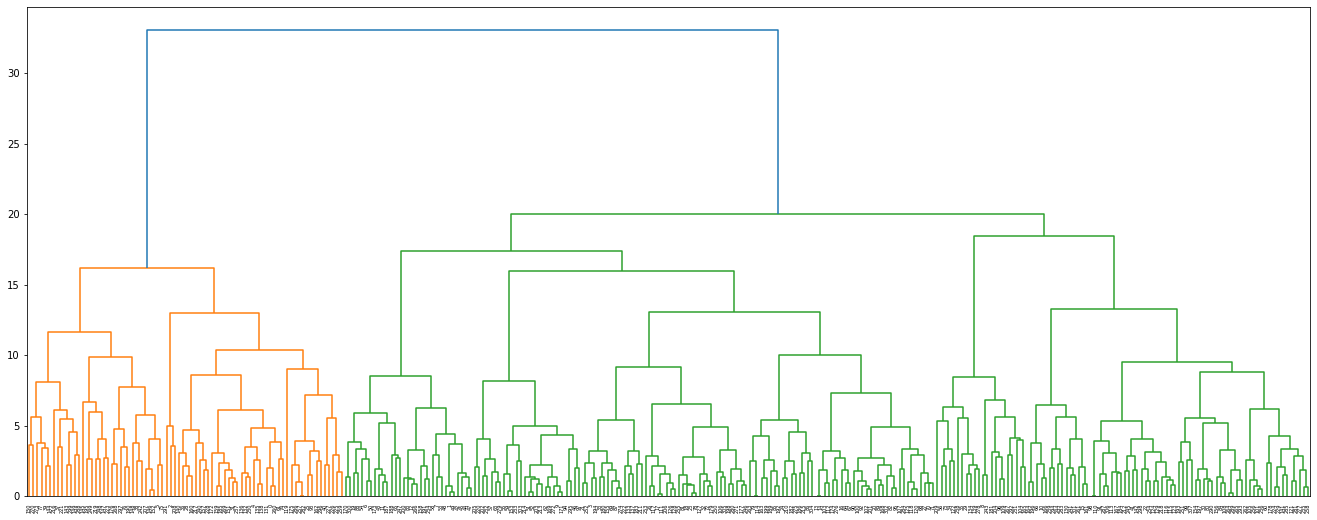

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize = (23, 9))
linkage_data = linkage(scaled, method='ward')
dendrogram(linkage_data)

plt.show()

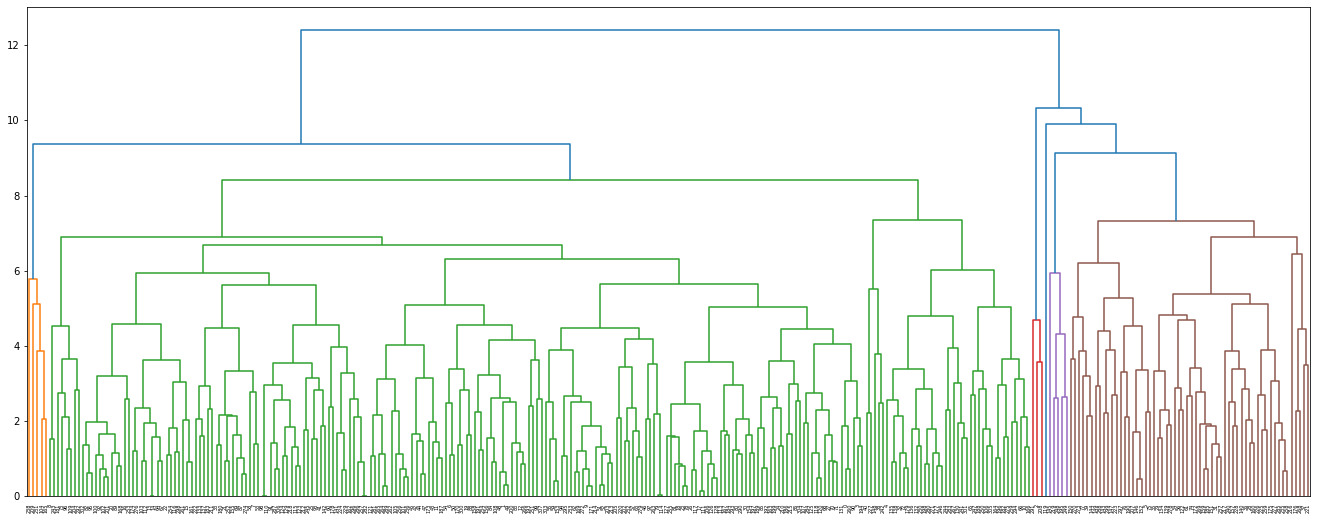

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize = (23, 9))
linkage_data = linkage(scaled, method='complete')
dendrogram(linkage_data)

plt.show()

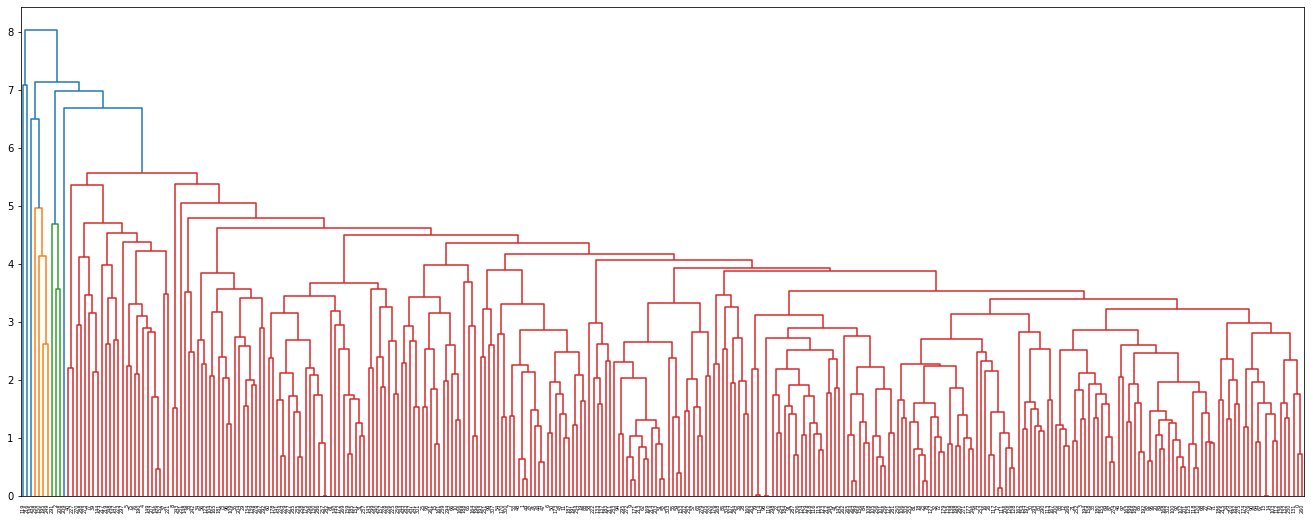

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize = (23, 9))
linkage_data = linkage(scaled, method='average')
dendrogram(linkage_data)

plt.show()

Lakukan hierarchical clustering dengan metric Euclidean dan jumlah cluster sama dengan cluster Kmeans

In [19]:
from sklearn.cluster import AgglomerativeClustering

hierarchical_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage = "complete")
labels = hierarchical_cluster.fit_predict(scaled)

print(labels)

[0 0 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 3 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1
 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 1 1 0 1 0 1
 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 2 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 0]


Tampilkan dalam bentuk dataframe kesimpulan dari cluster dengan kriteria sama dengan kesimpulan di atas

In [20]:
data["K-Means"] = labels

data.groupby("K-Means").agg(Area_Category = ('Area Category',pd.Series.mode),
                                 Nama_Daerah = ('Nama Daerah',pd.Series.mode),
                                 Luas_Tanah = ('Luas Tanah (m2)', 'mean'),
                                 Luas_Bangunan = ('Luas Bangunan (m2)','mean'),
                                 Jumlah_Kamar = ('Jumlah Kamar','mean'), Jumlah_Kamar_mandi = ('Jumlah Kamar Mandi','mean'),
                                 Tingkat_Lantai = ('Tingkat/Lantai ','mean'),
                                 Harga_Penawaran = ('Harga Penawaran (dari Owner)', 'mean'),
                                 Terjual_Belum = ('Terjual/Belum', pd.Series.mode),
                                 Arah_Hadap_Rumah = ('Arah Hadap Rumah', pd.Series.mode),
                                 Posisi_Rumah = ('Posisi Rumah', pd.Series.mode),
                                 Lebar_Jalan_Depan_Rumah = ('Lebar Jalan Depan Rumah (ROW)', pd.Series.mode),
                                 Count = ("Cluster",'count'))

,Area_Category,Nama_Daerah,Luas_Tanah,Luas_Bangunan,Jumlah_Kamar,Jumlah_Kamar_mandi,Tingkat_Lantai,Harga_Penawaran,Terjual_Belum,Arah_Hadap_Rumah,Posisi_Rumah,Lebar_Jalan_Depan_Rumah,Count
K-Means,,,,,,,,,,,,,
0,3,11,161.182573,189.257261,3.792531,2.825726,1.798755,78.668050,0,3,2,0,241
1,1,11,475.730159,555.698413,5.904762,5.095238,2.055556,93.587302,0,3,2,0,63
2,"[1, 2, 3]","[11, 48, 63]",281.666667,390.000000,6.000000,4.333333,2.333333,71.333333,0,3,0,0,3
3,3,42,240.000000,350.000000,13.000000,13.000000,2.000000,75.000000,0,1,2,2,1
